In [20]:
import pandas as pd
import datetime as dt

In [19]:
dataset = pd.read_csv('netflix daily top 10.csv')
display(dataset.head())
dataset.shape

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


(7100, 10)

In [26]:
# Descobri o período da análise
inicio = pd.to_datetime(dataset['As of']).dt.date.min()
print(inicio)
fim = pd.to_datetime(dataset['As of']).dt.date.max()
print(fim)

2020-04-01
2022-03-11


In [28]:
# Verifiquei valores nulos - Atributo de 'Netflix Exclusive' possui 2501 valores nulos.
dataset.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

Rank                   Axes(0.125,0.11;0.227941x0.77)
Days In Top 10      Axes(0.398529,0.11;0.227941x0.77)
Viewership Score    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

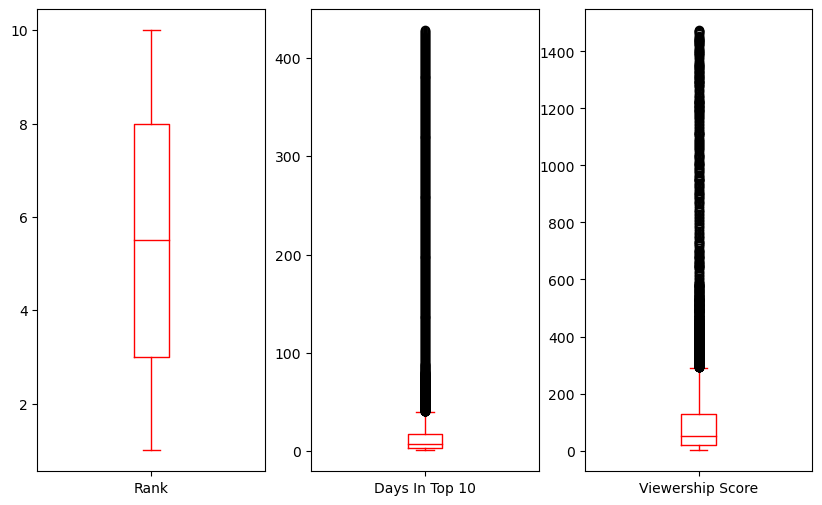

In [35]:
# Visualizei valores Outliers - Valores outliers em atributos de 'Days In Top 10' e 'Viwership Score'
dataset.plot(kind= 'box', figsize= (10,6), subplots = True, color= 'red')

In [36]:
# vi os outliers do atributo 'Days In Top' acima do nível 100 - Eram de um só título no catálogo.
dataset.loc[dataset['Days In Top 10']>= 100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


In [37]:
# Continuei a analisar o 'Cocomelon' - foi o título mais visto dentro do período entre 2020 e 2022.
dataset.Title.value_counts()

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64

In [57]:
# Finalizei vizualizando  o Ranking de 'Cocomelon' filtrando pelo atributo 'Viewership Score'
max_viewshipscore = dataset['Viewership Score'].max()
dataset.loc[dataset['Viewership Score'] == max_viewshipscore]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474
